                             Bhawna Singh [EDML AI C76]

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings

In [ ]:
# Import the libraries you will be using for analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
#from google.colab import drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
# Try loading one file

# df = pd.read_parquet('2023-1.parquet')
# df.info()


# Google Drive Path to data files
gdrive_data_path = '/content/drive/MyDrive/upgrad/data'

gdrive_trip_data_path = gdrive_data_path + '/trip_records/'
gdrive_zone_data_path = gdrive_data_path + '/taxi_zones/'

df = pd.read_parquet(gdrive_trip_data_path+'2023-1.parquet')
df.info()

# df.shape %%

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file
#       -> day
#       -> hour: append sampled data
#       -> move to next hour
#       -> move to next day after 24 hours
#       -> move to next month file
# Create a single dataframe for the year combining all the monthly data


# Define a sampling fraction
ny_taxi_sampling_fraction = 0.05

# Select the folder having data files
import os

# Select the folder having data files
os.chdir(gdrive_trip_data_path)

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        df_nyTaxi_trip_month = pd.read_parquet(file_path)

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # group the trip data (for a month) on date
        df_nyTaxi_trip_days = df_nyTaxi_trip_month.groupby(df_nyTaxi_trip_month['tpep_pickup_datetime'].dt.day)

        # Loop through dates and then loop through every hour of each date
        for key_date, df_date in df_nyTaxi_trip_days :

            # group the trip data (for a date) on hours
            df_nyTaxi_trip_hours = df_date.groupby(df_date['tpep_pickup_datetime'].dt.hour)

            # Iterate through each hour of the selected date
            for key_hour, df_hour in df_nyTaxi_trip_hours :

                # Sample 5% of the hourly data randomly
                sample = df_hour.sample(frac = ny_taxi_sampling_fraction, random_state = 42)

                # add data of this hour to the dataframe
                sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data])

    except Exception as e:
        print(f"Error reading file {file_name}: {str(e)}")
print('done')
len(df)

done


1991251

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet

# Create a directory for sample data
dir_name = "sampled_data"
try:
    os.mkdir(dir_name)
except FileExistsError:
    print(f"Directory '{dir_name}' already exists.")

out_filepath = os.path.join(os.getcwd(), dir_name+'/nyTaxi_2023_sample.parquet')

# Write data to a parquet file
df.to_parquet(out_filepath)

Directory 'sampled_data' already exists.


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Added Code Cell for filepath variables ------  Remove before submission

from google.colab import drive
drive.mount('/content/drive')

import os

# Google Drive Path to data files
gdrive_data_path = '/content/drive/MyDrive/upgrad/data'
dir_name = "sampled_data"

gdrive_trip_data_path = gdrive_data_path + '/trip_records/'
gdrive_zone_data_path = gdrive_data_path + '/taxi_zones/'

# Select the folder having data files
os.chdir(gdrive_trip_data_path)
out_filepath = os.path.join(os.getcwd(), dir_name+'/nyTaxi_2023_sample.parquet')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Load the new data file

#df_ny_taxi_trips_sampled = pd.read_parquet(out_filepath)
df = pd.read_parquet(out_filepath)

In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
3703            2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
4166            2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
3847            2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
1882            2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
2995366         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

         trip_distance  RatecodeID store_and_fwd_flag  PULocationID  \
3703              2.85         1.0                  N           263   
4166              1.32         1.0                  N            90   
3847              3.17         1.0                  N            79   
1882              3.80         1.0                  N           142   
2995366           7.97         NaN               None           140   

         DOLocationID  payment_type  fare_amount  extra  mta_tax  tip_amount  \
3703               41             1        15.60    1.0      0.5        4.12   
4166              137             1        12.80    1.0      0.5        3.56   
3847              141             1        14.90    1.0      0.5        3.98   
1882              107             2        24.70    1.0      0.5        0.00   
2995366            17             0        36.83    0.0      0.5        8.17   

         tolls_amount  improvement_surcharge  total_amount  \
3703              0.0                    1.0         24.72   
4166              0.0                    1.0         21.36   
3847              0.0                    1.0         23.88   
1882              0.0                    1.0         29.70   
2995366           0.0                    1.0         49.00   

         congestion_surcharge  airport_fee  Airport_fee  
3703                      2.5          0.0          NaN  
4166                      2.5          0.0          NaN  
3847                      2.5          0.0          NaN  
1882                      2.5          0.0          NaN  
2995366                   NaN          NaN          NaN

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1991251 entries, 3703 to 3312913
Data columns (total 20 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            f

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed

df.reset_index(inplace=True, drop=True)


# Drop 'store_and_fwd_flag' as it does not aid in the task at hand
df.drop('store_and_fwd_flag', axis=1, inplace=True)

df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.85         1.0           263            41             1   
1           1.32         1.0            90           137             1   
2           3.17         1.0            79           141             1   
3           3.80         1.0           142           107             2   
4           7.97         NaN           140            17             0   

   fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0        15.60    1.0      0.5        4.12           0.0   
1        12.80    1.0      0.5        3.56           0.0   
2        14.90    1.0      0.5        3.98           0.0   
3        24.70    1.0      0.5        0.00           0.0   
4        36.83    0.0      0.5        8.17           0.0   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         24.72                   2.5          0.0   
1                    1.0         21.36                   2.5          0.0   
2                    1.0         23.88                   2.5          0.0   
3                    1.0         29.70                   2.5          0.0   
4                    1.0         49.00                   NaN          NaN   

   Airport_fee  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN

In [ ]:
# Remove non New York data (zone codes beyond 263)
df = df[~((df.PULocationID > 263) |(df.DOLocationID > 263))]

In [ ]:
# Some data is logically incorrect, may be due to data entry or capture
# Rectify them
df[df.tpep_dropoff_datetime < df.tpep_pickup_datetime]

# create criteria mask
condition_mask = df.tpep_dropoff_datetime < df.tpep_pickup_datetime
df.loc[condition_mask, ['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df.loc[condition_mask, ['tpep_dropoff_datetime', 'tpep_pickup_datetime']].values


**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns

df['Airport_fee'] = np.where(df['Airport_fee'].isnull(), df['airport_fee'], df['Airport_fee'])

df.drop('airport_fee', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1958444 entries, 0 to 1991250
Data columns (total 18 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   PULocationID           int64         
 7   DOLocationID           int64         
 8   payment_type           int64         
 9   fare_amount            float64       
 10  extra                  float64       
 11  mta_tax                float64       
 12  tip_amount             float64       
 13  tolls_amount           float64       
 14  improvement_surcharge  float64       
 15  total_amount           float64       
 16  congestion_surcharge   float64       
 17  Airport_fee            float64       
dtypes: datetime64[us](2), float

/tmp/ipython-input-17-1619198486.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Airport_fee'] = np.where(df['Airport_fee'].isnull(), df['airport_fee'], df['Airport_fee'])


**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative

df_negative_fare = df[df.fare_amount < 0 ]
df_negative_fare.head()

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts

df_negative_fare[['fare_amount','RatecodeID']]

Empty DataFrame
Columns: [fare_amount, RatecodeID]
Index: []

In [ ]:
# Find which columns have negative values

df_stats = df.describe().T

df_stats = df_stats[['min', 'max']]

# remove non-numeric columns from the stats dataframe for easier
# selection and analysis of minimum and maximum data
#df_stats = df_stats.drop('tpep_pickup_datetime')
#df_stats = df_stats.drop('tpep_dropoff_datetime')
df_stats

# The DataFrame below shows columns with negative values
# We can see some outliers as well from the max column.
# We will deal with them later.

min                  max
VendorID                               1.0                  2.0
tpep_pickup_datetime   2001-01-01 00:06:49  2024-01-01 00:01:34
tpep_dropoff_datetime  2001-01-01 15:42:11  2024-01-01 20:50:55
passenger_count                        0.0                  9.0
trip_distance                          0.0              56823.8
RatecodeID                             1.0                 99.0
PULocationID                           1.0                263.0
DOLocationID                           1.0                263.0
payment_type                           0.0                  4.0
fare_amount                            0.0            143163.45
extra                                 -1.0                 20.8
mta_tax                               -0.5                  4.0
tip_amount                             0.0               223.08
tolls_amount                           0.0                 95.0
improvement_surcharge                 -1.0                  1.0
total_amount                         -5.75            143167.45
congestion_surcharge                  -2.5                  2.5
Airport_fee                          -1.75                 1.75

In [ ]:
# Fix these negative values

# Negative values are present for following columns - 'extra', 'mta_tax',
# 'improvement_surcharge', 'total_amount', 'congestion_surcharge' and
# 'Airport_fee' in the currently sampled data.

# As there seems no relation with the values of other numeric columns,
# lets take the absolute of the negative values as these seem to be data
# entry/store issues.


# Start refering to the main dataframe
# I. Change negative values of Column - 'extra'

print(df[df.extra < 0]['extra'])
df.extra = df.extra.abs()
print('Modified \'extra\' column', df[df.extra < 0]['extra'],'\n')


# II. Change negative values of Column - 'mta_tax'

print(df[df.mta_tax < 0]['mta_tax'])
df.mta_tax = df.mta_tax.abs()
print('Modified \'mta_tax\' column', df[df.mta_tax < 0]['mta_tax'],'\n')


# III. Change negative values of Column - 'improvement_surcharge'

print(df[df.improvement_surcharge < 0]['improvement_surcharge'])
df.improvement_surcharge = df.improvement_surcharge.abs()
print('Modified \'improvement_surcharge\' column', df[df.improvement_surcharge < 0]['improvement_surcharge'],'\n')


# IV. Change negative values of Column - 'total_amount'

print(df[df.total_amount < 0]['total_amount'])
df.total_amount = df.total_amount.abs()
print('Modified \'total_amount\' column', df[df.total_amount < 0]['total_amount'],'\n')


# V. Change negative values of Column - 'congestion_surcharge'

print(df[df.congestion_surcharge < 0]['congestion_surcharge'])
df.congestion_surcharge = df.congestion_surcharge.abs()
print('Modified \'congestion_surcharge\' column', df[df.congestion_surcharge < 0]['congestion_surcharge'],'\n')


# VI. Change negative values of Column - 'Airport_fee'

print(df[df.Airport_fee < 0]['Airport_fee'])
df.Airport_fee = df.Airport_fee.abs()
print('Modified \'Airport_fee\' column', df[df.Airport_fee < 0]['Airport_fee'],'\n')

1423179   -1.0
1599492   -1.0
Name: extra, dtype: float64
Modified 'extra' column Series([], Name: extra, dtype: float64) 

9092      -0.5
77199     -0.5
77919     -0.5
86508     -0.5
115539    -0.5
          ... 
1831055   -0.5
1842951   -0.5
1886879   -0.5
1929183   -0.5
1961114   -0.5
Name: mta_tax, Length: 75, dtype: float64
Modified 'mta_tax' column Series([], Name: mta_tax, dtype: float64) 

3965      -1.0
9092      -1.0
77199     -1.0
77919     -1.0
86508     -1.0
          ... 
1831055   -1.0
1842951   -1.0
1886879   -1.0
1929183   -1.0
1961114   -1.0
Name: improvement_surcharge, Length: 79, dtype: float64
Modified 'improvement_surcharge' column Series([], Name: improvement_surcharge, dtype: float64) 

3965      -1.00
9092      -5.25
77199     -4.00
77919     -4.00
86508     -4.00
           ... 
1831055   -3.25
1842951   -4.00
1886879   -4.00
1929183   -4.00
1961114   -4.00
Name: total_amount, Length: 79, dtype: float64
Modified 'total_amount' column Series([], Name: total_amo

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column

missingValueCounts = df.isnull().sum()
total_rows = len(df)
columnwise_proportion = missingValueCounts / total_rows


# Print missing values for all columns

print("Missing values per column(proportion):\n")
print("-"*38)
print(columnwise_proportion)

Missing values per column(proportion):

--------------------------------------
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.034284
trip_distance            0.000000
RatecodeID               0.034284
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
mta_tax                  0.000000
tip_amount               0.000000
tolls_amount             0.000000
improvement_surcharge    0.000000
total_amount             0.000000
congestion_surcharge     0.034284
Airport_fee              0.034284
dtype: float64


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values

null_passenger_count_rows = df[df.passenger_count.isnull()]
print(null_passenger_count_rows)



# Check if columns having null values belong to same rows.

df2 = df[df.passenger_count.isnull() & df.RatecodeID.isnull() & df.congestion_surcharge.isnull() & df.Airport_fee.isnull()]


df2
# The output of df2 signifies that in the sampled dataset, the rows that have
# 'null' values for 'passenger_count' also have null values for 'RatecodeID',
# 'congestion_surcharge' and 'Airport_fee'.


# Impute NaN values in 'passenger_count'

df.passenger_count = df.passenger_count.fillna(df.passenger_count.median())
df.passenger_count.isnull().sum()

print(f'Rows with null \'passenger_count\' (after imputation) = {df.passenger_count.isnull().sum()}')


         VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
4               2  2023-01-01 00:59:15   2023-01-01 01:23:15              NaN   
6               2  2023-01-01 00:39:50   2023-01-01 00:54:29              NaN   
8               2  2023-01-01 00:43:47   2023-01-01 00:56:12              NaN   
17              2  2023-01-01 00:33:00   2023-01-01 01:01:00              NaN   
26              2  2023-01-01 00:33:00   2023-01-01 00:57:00              NaN   
...           ...                  ...                   ...              ...   
1991107         1  2023-05-31 22:31:05   2023-05-31 22:49:42              NaN   
1991116         1  2023-03-31 22:35:59   2023-03-31 22:48:19              NaN   
1991136         1  2023-12-31 22:06:29   2023-12-31 22:16:45              NaN   
1991145         2  2023-05-31 22:53:25   2023-05-31 22:54:51              NaN   
1991231         1  2023-05-31 23:13:45   2023-05-31 23:25:49              NaN   

         trip_distance  Rat

Did you find zeroes in passenger_count? Handle these.

In [ ]:
# Handle zeroes in passenger_count.
df[df.passenger_count == 0] # 31322

df.loc[df.passenger_count == 0, 'passenger_count'] = df.passenger_count.median()


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'

print(f'Rows with null \'RatecodeID\' = {df.RatecodeID.isnull().sum()}')

df.RatecodeID = df.RatecodeID.fillna(df.RatecodeID.median())
df.RatecodeID.isnull().sum()

print(f'Rows with null \'RatecodeID\' (after imputation) = {df.RatecodeID.isnull().sum()}')


Rows with null 'RatecodeID' = 67143
Rows with null 'RatecodeID' (after imputation) = 0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge

print(f'Rows with null \'congestion_surcharge\' = {df.congestion_surcharge.isnull().sum()}')

df.congestion_surcharge = df.congestion_surcharge.fillna(df.congestion_surcharge.median())
df.congestion_surcharge.isnull().sum()

print(f'Rows with null \'congestion_surcharge\' (after imputation) = {df.congestion_surcharge.isnull().sum()}')


Rows with null 'congestion_surcharge' = 67143
Rows with null 'congestion_surcharge' (after imputation) = 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values

print(f'Rows with null \'Airport_fee\' = {df.Airport_fee.isnull().sum()}')

df.Airport_fee = df.Airport_fee.fillna(df.Airport_fee.median())
df.Airport_fee.isnull().sum()

print(f'Rows with null \'Airport_fee\' (after imputation) = {df.Airport_fee.isnull().sum()}')


Rows with null 'Airport_fee' = 67143
Rows with null 'Airport_fee' (after imputation) = 0


### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns

df.describe().T

count                        mean  \
VendorID               1958444.0                    1.732268   
tpep_pickup_datetime     1958444  2023-07-02 17:27:22.356255   
tpep_dropoff_datetime    1958444  2023-07-02 17:44:41.795489   
passenger_count        1958444.0                    1.372048   
trip_distance          1958444.0                    3.718375   
RatecodeID             1958444.0                    1.603088   
PULocationID           1958444.0                  164.357741   
DOLocationID           1958444.0                  162.592334   
payment_type           1958444.0                    1.162703   
fare_amount            1958444.0                   19.531392   
extra                  1958444.0                    1.589269   
mta_tax                1958444.0                    0.496338   
tip_amount             1958444.0                    3.512831   
tolls_amount           1958444.0                    0.570275   
improvement_surcharge  1958444.0                    0.999321   
total_amount           1958444.0                   28.547115   
congestion_surcharge   1958444.0                    2.328023   
Airport_fee            1958444.0                    0.135245   

                                       min                         25%  \
VendorID                               1.0                         1.0   
tpep_pickup_datetime   2001-01-01 00:06:49  2023-04-02 11:01:07.500000   
tpep_dropoff_datetime  2001-01-01 15:42:11  2023-04-02 11:16:14.750000   
passenger_count                        1.0                         1.0   
trip_distance                          0.0                        1.05   
RatecodeID                             1.0                         1.0   
PULocationID                           1.0                       132.0   
DOLocationID                           1.0                       113.0   
payment_type                           0.0                         1.0   
fare_amount                            0.0                         9.3   
extra                                  0.0                         0.0   
mta_tax                                0.0                         0.5   
tip_amount                             0.0                         1.0   
tolls_amount                           0.0                         0.0   
improvement_surcharge                  0.0                         1.0   
total_amount                           0.0                       15.96   
congestion_surcharge                   0.0                         2.5   
Airport_fee                            0.0                         0.0   

                                              50%                         75%  \
VendorID                                      2.0                         2.0   
tpep_pickup_datetime   2023-06-27 12:41:48.500000  2023-10-06 20:06:17.250000   
tpep_dropoff_datetime         2023-06-27 13:00:38  2023-10-06 20:24:54.500000   
passenger_count                               1.0                         1.0   
trip_distance                                1.79                        3.38   
RatecodeID                                    1.0                         1.0   
PULocationID                                161.0                       233.0   
DOLocationID                                162.0                       234.0   
payment_type                                  1.0                         1.0   
fare_amount                                  13.5                        21.9   
extra                                         1.0                         2.5   
mta_tax                                       0.5                         0.5   
tip_amount                                   2.85                        4.42   
tolls_amount                                  0.0                         0.0   
improvement_surcharge                         1.0                         1.0   
total_amount                                 21.0                       30.62   
congestion_surcharge      

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6

df_7_or_more_passengers = df[df.passenger_count > 6]
print(df_7_or_more_passengers.passenger_count.value_counts())

# Remove the rows with more than 6 passengers
df = df[df.passenger_count <= 6]


# Row_Count :1996208 -----> 1996182

passenger_count
8.0    6
9.0    6
7.0    4
Name: count, dtype: int64


In [ ]:
# Continue with outlier handling

# Handling Outliers -
# -----------------

print(f'No. of Rows(Initial)={len(df)}')



# I. 'Trip_distance is nearly 0 and fare_amount is more than 300'

df_row_mask = ~((df.trip_distance < 1) & (df.fare_amount > 300))
print("I. 'Trip_distance is nearly 0 and fare_amount is more than 300'", '\n','-'*62)
print(df_row_mask.value_counts())

df = df[df_row_mask]
print(f'No. of Rows(after outlier handling)={len(df)}')
# Row_Count :1996182 -----> 1996140




# II. 'Entries where trip_distance and fare_amount are 0 but the pickup and
#      dropoff zones are different (both distance and fare should not be zero for
#      different zones)'

# Should not remove these rows, rather, we must find similar records and get the median of those rows

df_row_mask = ((df.trip_distance == 0) & (df.fare_amount == 0) & (df.PULocationID != df.DOLocationID))
df_row_mask = ~df_row_mask

print("\n\nII. 'Trip_distance and fare_amount are 0 but PU and DO zones are different", '\n','-'*73)
print(df_row_mask.value_counts())

df = df[df_row_mask]
print(f'No. of Rows(after outlier handling)={len(df)}')
# Row_Count :1996140 -----> 1996072



# III. 'Entries where trip_distance is more than 250 miles'

df_row_mask = (df.trip_distance > 250)
df_row_mask = ~df_row_mask

print("\n\nIII. 'Trip_distance is more than 250 miles", '\n','-'*41)
print(df_row_mask.value_counts())

df = df[df_row_mask]
print(f'No. of Rows(after outlier handling)={len(df)}')
# Row_Count :1996072 -----> 1996020



# IV. 'Entries where payment_type is 0 (there is no payment_type 0 defined in
# the data dictionary)'

df_row_mask = (df.payment_type == 0)
#df_row_mask = ~df_row_mask

print(df.payment_type.value_counts())
payment_type_median = df.payment_type.median()


print('\n', df[df_row_mask][['payment_type', 'tip_amount']])

# Since Cash tips are not included in the 'tip_amount' field, rows with
# 'tip_amount' '0' will be made as payment_type=2 and the rest will be made
# payment_type=1 (corresponding to the median of the whole dataset)


# Make cash payment type
df_row_mask = ((df.payment_type == 0) & (df.tip_amount == 0))
df.loc[df_row_mask, 'payment_type'] = 2

# Make payment_type same as median value of the column
df_row_mask = (df.payment_type == 0)
df.loc[df_row_mask, 'payment_type'] = payment_type_median

df[df.payment_type == 0]

# Row_Count :1996020 -----> 1996020

No. of Rows(Initial)=1958428
I. 'Trip_distance is nearly 0 and fare_amount is more than 300' 
 --------------------------------------------------------------
True     1958408
False         20
Name: count, dtype: int64
No. of Rows(after outlier handling)=1958408


II. 'Trip_distance and fare_amount are 0 but PU and DO zones are different 
 -------------------------------------------------------------------------
True     1958378
False         30
Name: count, dtype: int64
No. of Rows(after outlier handling)=1958378


III. 'Trip_distance is more than 250 miles 
 -----------------------------------------
trip_distance
True     1958333
False         45
Name: count, dtype: int64
No. of Rows(after outlier handling)=1958333
payment_type
1    1542657
2     325382
0      67112
4      14003
3       9179
Name: count, dtype: int64

          payment_type  tip_amount
4                   0        8.17
6                   0        4.00
8                   0        4.28
17                  0        2.0

Empty DataFrame
Columns: [VendorID, tpep_pickup_datetime, tpep_dropoff_datetime, passenger_count, trip_distance, RatecodeID, PULocationID, DOLocationID, payment_type, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge, Airport_fee]
Index: []

In [ ]:
# Do any columns need standardising?
df.head()
print(df.VendorID.value_counts())

# VendorID has two valid values, (1,2).
# There are 469 rows with VendorID=6 and all of them have pickup_location as 265
# [which is not a valid New York Zone code (Zone Code are numbers ranging
# from 1-263)] Refer the document at (pg-5, last paragraph):
# https://www.nyc.gov/assets/tlc/downloads/pdf/trip_record_user_guide.pdf

# These seem to be non-New York related data and hence on that assumption these
# records are being removed from the dataset(inspite of being a relatively
# larger chunk than previously dropped rows.)

df = df[df.VendorID.isin([1, 2])]
print(df.describe().T)

df.head()
print('\n', df.mta_tax.value_counts())

# Analysing 'mta_tax'
# As mta_tax is $0.50 or $0.0, hence all other values are incorrect
# and we will convert them to the median value of this column

mta_tax_median = df.mta_tax.median()

# Make mta_tax same as median value of the column
df_row_mask = (df.mta_tax > 0.50)
df.loc[df_row_mask, 'mta_tax'] = mta_tax_median


print('\n', df.improvement_surcharge.value_counts())

print('\n', df.congestion_surcharge.value_counts())

VendorID
2    1434029
1     524304
Name: count, dtype: int64
                           count                        mean  \
VendorID               1958333.0                     1.73227   
tpep_pickup_datetime     1958333  2023-07-02 17:27:40.260094   
tpep_dropoff_datetime    1958333  2023-07-02 17:44:59.703082   
passenger_count        1958333.0                    1.372004   
trip_distance          1958333.0                     3.38181   
RatecodeID             1958333.0                    1.602796   
PULocationID           1958333.0                   164.35912   
DOLocationID           1958333.0                  162.593054   
payment_type           1958333.0                    1.210422   
fare_amount            1958333.0                   19.453292   
extra                  1958333.0                    1.589336   
mta_tax                1958333.0                     0.49635   
tip_amount             1958333.0                    3.512794   
tolls_amount           1958333.0           

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
# Add some Derived Columns for analysis

df['pickup_hour'] = df.tpep_pickup_datetime.dt.hour
df['dropoff_hour'] = df.tpep_dropoff_datetime.dt.hour

df['trip_duration'] = (df.tpep_dropoff_datetime - df.tpep_pickup_datetime).dt.total_seconds()

# NOTE : 'trip_duration' is in seconds
# ************************************

df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee',
 'pickup_hour',
 'dropoff_hour',
 'trip_duration']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: ***Categorical***
* `tpep_pickup_datetime`: ***Numerical***
* `tpep_dropoff_datetime`: ***Numerical***
* `passenger_count`: ***Numerical***
* `trip_distance`: ***Numerical***
* `RatecodeID`: ***Categorical***
* `PULocationID`: ***Categorical***
* `DOLocationID`: ***Categorical***
* `payment_type`: ***Categorical***
* `pickup_hour`: ***Categorical***
* `trip_duration`: ***Numerical***


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

**Ans** - *** They all are numerical Values.*** *But if we analyse the data-dictionary, then 'mta_tax' and 'improvement_surcharge' take only from a predefined set of values ($0.50, $0.30 respectively or $0.0)*


##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
# Add some more Derived Columns for analysis

# ---------------------------------------------------------------------

# Create a category type for ordered DayOfWeek
import pandas.api.types as pty
day_categories = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_category_type = pty.CategoricalDtype(categories = day_categories, ordered = True)

# ---------------------------------------------------------------------

# Create a category type for ordered MonthNames
import pandas.api.types as pty
month_categories = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
month_category_type = pty.CategoricalDtype(categories = month_categories, ordered = True)

# ---------------------------------------------------------------------

# Get/Derive Day-of-Week from the pickupTime and convert
# it into the customized ordered DayOfWeek datatype
df['ordered_day_name'] = df.tpep_pickup_datetime.dt.day_name()
df['ordered_day_name'] = df['ordered_day_name'].astype(day_category_type)

# ---------------------------------------------------------------------

# Get/Derive month names from the pickupTime and convert
# it into the customized ordered month-names datatype
df['ordered_month_name'] = df.tpep_pickup_datetime.dt.month_name()
df['ordered_month_name'] = df['ordered_month_name'].astype(month_category_type)


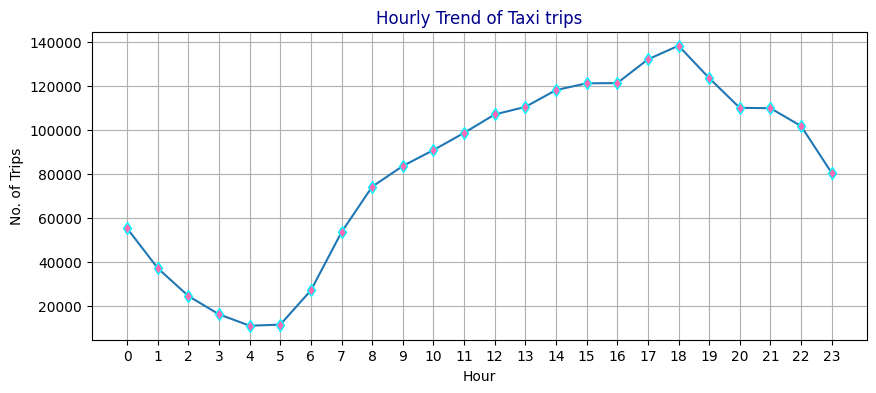

In [ ]:
# Find and show the hourly trends in taxi pickups

grouped_sizes = df.groupby('pickup_hour').size()

ax = grouped_sizes.plot(figsize=(10, 4),
                        kind='line',
                        marker='d',
                        markerfacecolor='hotpink',
                        markeredgecolor='cyan')

# Display all Hours
ax.set_xticks(range(len(grouped_sizes.keys())))


plt.title('Hourly Trend of Taxi trips', color='darkblue')
plt.xlabel('Hour')
plt.ylabel('No. of Trips')
plt.grid(True)
plt.show()

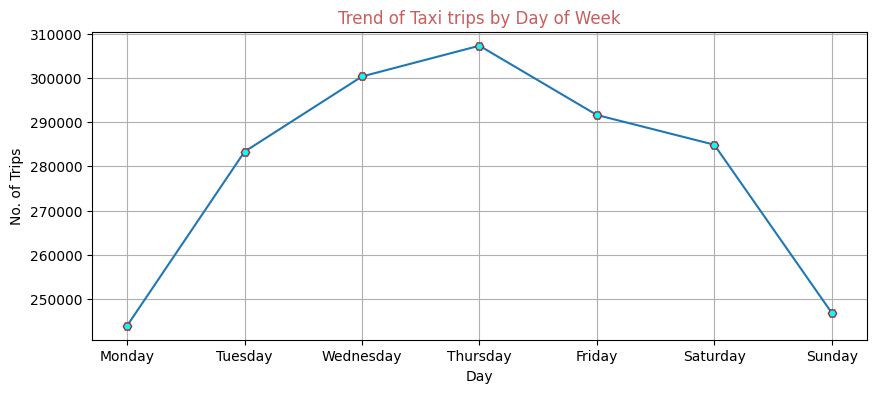

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)

# Group the dataset
grouped_day_name = df.groupby('ordered_day_name', observed=False).size()

ax = grouped_day_name.plot(figsize=(10, 4), kind = 'line', marker = 'H', markerfacecolor = 'cyan', markeredgecolor = 'brown')

# Display all categories
ax.set_xticks(range(len(grouped_day_name.keys())))

warnings.filterwarnings("default")

plt.title('Trend of Taxi trips by Day of Week', color='indianred')
plt.xlabel('Day')
plt.ylabel('No. of Trips')
plt.grid(True)
plt.show()


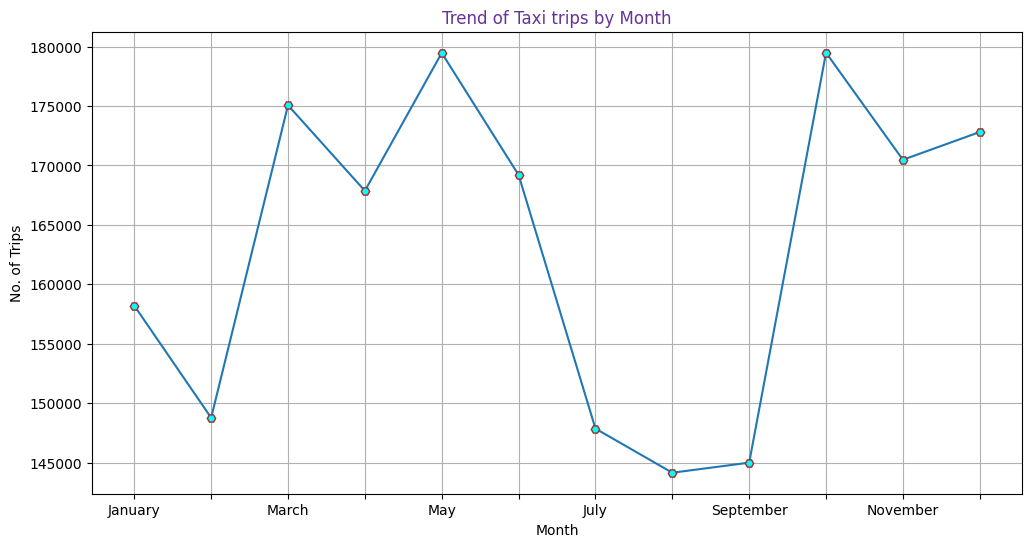

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


In [ ]:
# Show the monthly trends in pickups


# Group the dataset
grouped_month_name = df.groupby('ordered_month_name', observed=False).size()

ax = grouped_month_name.plot(figsize=(12, 6),
                             kind = 'line',
                             marker = 'H',
                             markerfacecolor = 'cyan',
                             markeredgecolor = 'brown')

# Display all categories
ax.set_xticks(range(len(grouped_month_name.keys())))

plt.title('Trend of Taxi trips by Month', color='RebeccaPurple')
plt.xlabel('Month')
plt.ylabel('No. of Trips')
plt.grid(True)
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

df[['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']].describe().T

# All the above data-attributes contain zero (0) values.
# Negative values had been taken care of, in Data-Cleaning section.


count       mean        std  min    25%    50%    75%  \
fare_amount    1958333.0  19.453292  16.745933  0.0   9.30  13.50  21.90   
tip_amount     1958333.0   3.512794   3.910577  0.0   1.00   2.85   4.42   
total_amount   1958333.0  28.469084  21.312531  0.0  15.96  21.00  30.62   
trip_distance  1958333.0   3.381810   4.341049  0.0   1.05   1.79   3.38   

                  max  
fare_amount    786.30  
tip_amount     223.08  
total_amount   790.55  
trip_distance  104.30

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

***Ans:***'fare_amount' (as fare_amount gets aggregated in the total amount at the end) and 'tip_amount' do not present so much difference in the analysis of the Business problem, so we can ignore them


**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.

df_mask_non_zero = (df.total_amount > 0)

print(df_mask_non_zero.value_counts())

# Get rows having non-zero values for above mentioned attributes
df_non_zero = df[df_mask_non_zero]


# Check if rows with same PU-DO zones and trip_distance as 0 exist
df_mask_same_PU_DO = (df_non_zero.PULocationID == df_non_zero.DOLocationID) & (df_non_zero.trip_distance == 0)
print(df_mask_same_PU_DO.value_counts())

# Remove rows having same PU-DO zones and trip_distance as 'null'
df_non_zero = df_non_zero[~df_mask_same_PU_DO]


total_amount
True     1958090
False        243
Name: count, dtype: int64
False    1943851
True       14239
Name: count, dtype: int64


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

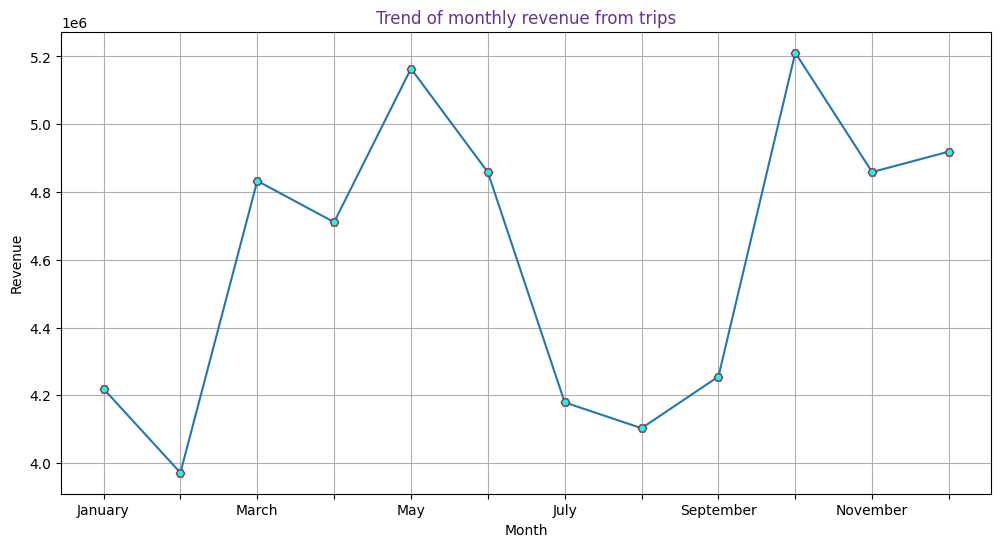

In [ ]:
# Group data by month and analyse monthly revenue

grouped_month_name = df_non_zero

# Get month names from the pickupTime and convert
# it into the customized ordered month-names datatype
grouped_month_name['ordered_month_name'] = df_non_zero.tpep_pickup_datetime.dt.month_name()


# use the month_category_type created in section[3.1.2]
grouped_month_name['ordered_month_name'] = grouped_month_name['ordered_month_name'].astype(month_category_type)

# Group the dataset
grouped_month_name = grouped_month_name.groupby('ordered_month_name', observed=False)['total_amount'].sum()
ax = grouped_month_name.plot(x='ordered_month_name',
                             y='total_amount',
                             figsize=(12, 6),
                             kind = 'line',
                             marker = 'H',
                             markerfacecolor = 'cyan',
                             markeredgecolor = 'brown')

# Display all categories
ax.set_xticks(range(len(grouped_month_name.keys())))

plt.title('Trend of monthly revenue from trips', color='RebeccaPurple')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

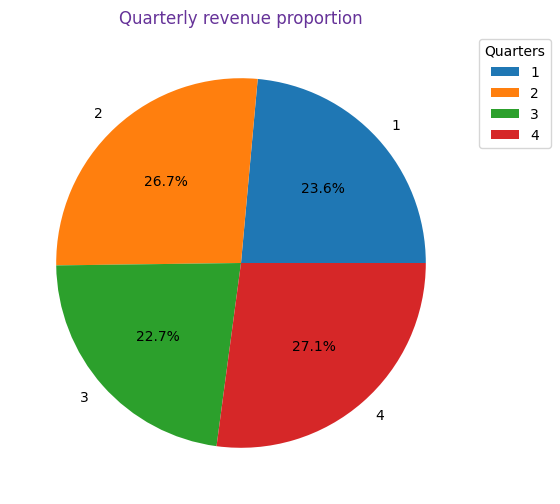

In [ ]:
# Calculate proportion of each quarter

grouped_quarter_number = df_non_zero

# Get quarter number from the pickupTime
# and convert it into the customized ordered month-names datatype
grouped_quarter_number['quarter_number'] = df_non_zero.tpep_pickup_datetime.dt.quarter

# Group the dataset
grouped_quarter_number = grouped_quarter_number.groupby('quarter_number',
                                                        observed=False)['total_amount'].sum()

ax = grouped_quarter_number.plot(x='quarter_number',
                                 y='total_amount',
                                 kind = 'pie',
                                 autopct='%1.1f%%',
                                 startangle=0,
                                 figsize=(6, 6))

plt.legend(title="Quarters", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.title('Quarterly revenue proportion', color='RebeccaPurple')
plt.ylabel('')
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

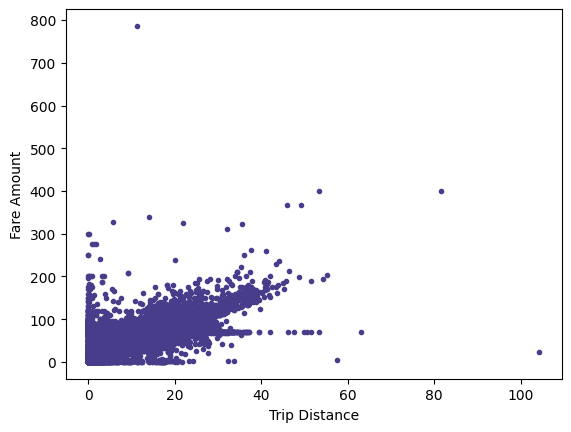



Correlation between trip_distance and fare_amount: 0.9485247358974304



In [ ]:
# Show how trip fare is affected by distance

df_trip = df_non_zero[df_non_zero.trip_distance > 0]


plt.scatter(df_trip.trip_distance,
            df_trip.fare_amount,
            marker='.',
            color='DarkSlateBlue',
            label='Data Points')


plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.show()

correlation_fare_distance = df_trip['trip_distance'].corr(df_trip['fare_amount'])
print(f"\n\nCorrelation between trip_distance and fare_amount: {correlation_fare_distance}\n")


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

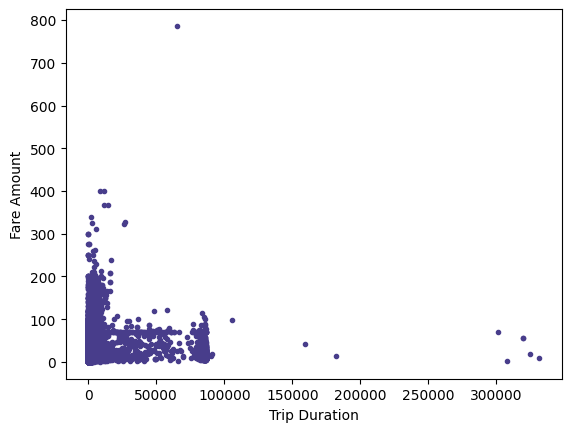



Correlation between trip_duration and fare_amount: 0.2831450469359104



In [ ]:
# Show relationship between fare and trip duration

df_trip = df_non_zero[df_non_zero.fare_amount > 0]


plt.scatter(df_trip.trip_duration,
            df_trip.fare_amount,
            marker='.',
            color='DarkSlateBlue',
            label='Data Points')

plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.show()

correlation_fare_duration = df_trip['trip_duration'].corr(df_trip['fare_amount'])
print(f"\n\nCorrelation between trip_duration and fare_amount: {correlation_fare_duration}\n")


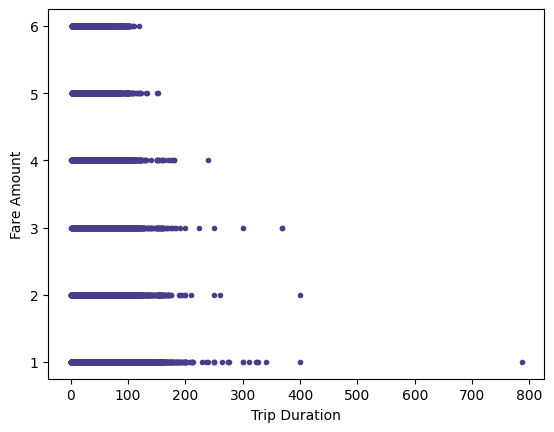



Correlation between passenger_count and fare_amount: 0.03889143348957943



In [ ]:
# Show relationship between fare and number of passengers

df_trip = df_non_zero[(df_non_zero.fare_amount > 0)]


plt.scatter(df_trip.fare_amount,
            df_trip.passenger_count,
            marker='.',
            color='DarkSlateBlue',
            label='Data Points')

plt.xlabel('Trip Duration')
plt.ylabel('Fare Amount')
plt.show()

correlation_fare_passenger = df_trip['passenger_count'].corr(df_trip['fare_amount'])
print(f"\n\nCorrelation between passenger_count and fare_amount: {correlation_fare_passenger}\n")


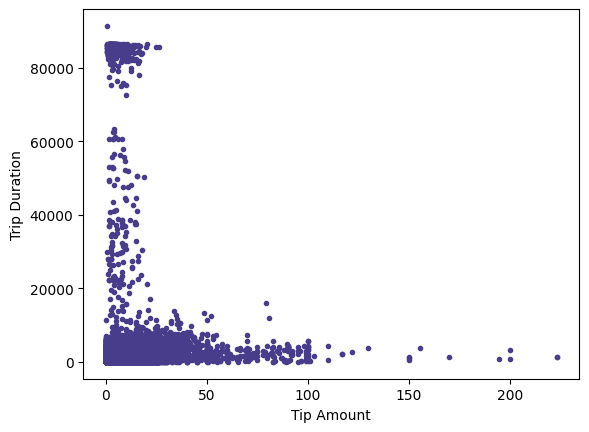



Correlation between trip_duration and tip_amount: 0.2768617897908041



In [ ]:
# Show relationship between tip and trip distance

df_trip = df_non_zero[df_non_zero.tip_amount > 0]


plt.scatter(df_trip.tip_amount,
            df_trip.trip_duration,
            marker='.',
            color='DarkSlateBlue',
            label='Data Points')

plt.xlabel('Tip Amount')
plt.ylabel('Trip Duration')
plt.show()

correlation_tip_duration = df_trip['trip_duration'].corr(df_trip['tip_amount'])
print(f"\n\nCorrelation between trip_duration and tip_amount: {correlation_tip_duration}\n")

**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()


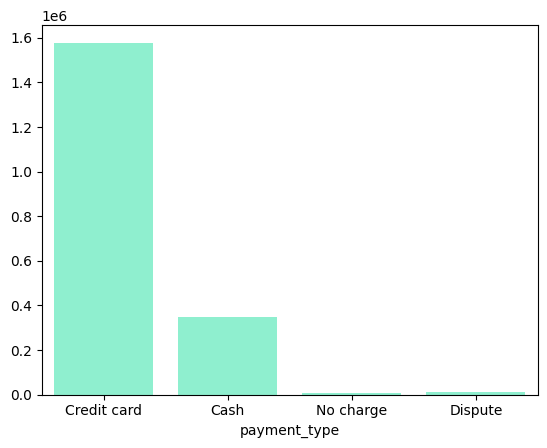

In [ ]:
# Analyse the distribution of different payment types (payment_type).


# Create mapping dictionary
payment_type_mapping = {1: 'Credit card', 2: 'Cash', 3: 'No charge', 4: 'Dispute'}

# Group the dataset
result = df_non_zero.groupby(['payment_type']).size()

# Replace numerical payment_type with string names
result = result.rename(index=payment_type_mapping)

# plot the result
sns.barplot(x = result.index, y = result.values, color='Aquamarine')
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file(gdrive_zone_data_path + 'taxi_zones.shp')
zones.tail()

<frozen importlib._bootstrap>:1047: ImportWarning: _PyDriveImportHook.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:1047: ImportWarning: _BokehImportHook.find_spec() not found; falling back to find_module()
/usr/local/lib/python3.11/dist-packages/geopandas/_compat.py:7: DeprecationWarning: The 'shapely.geos' module is deprecated, and will be removed in a future version. All attributes of 'shapely.geos' are available directly from the top-level 'shapely' namespace (since shapely 2.0.0).
  import shapely.geos


OBJECTID  Shape_Leng  Shape_Area                zone  LocationID  \
258       259    0.126750    0.000395  Woodlawn/Wakefield         259   
259       260    0.133514    0.000422            Woodside         260   
260       261    0.027120    0.000034  World Trade Center         261   
261       262    0.049064    0.000122      Yorkville East         262   
262       263    0.037017    0.000066      Yorkville West         263   

       borough                                           geometry  
258      Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...  
259     Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...  
260  Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...  
261  Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....  
262  Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

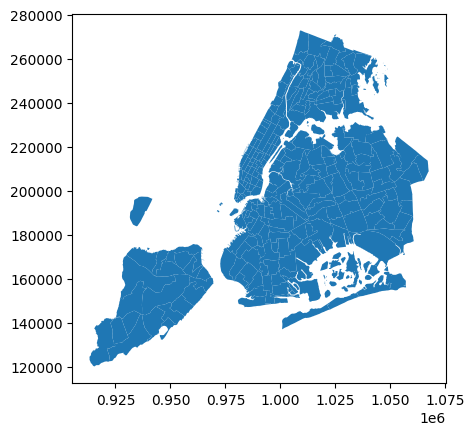

In [ ]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID

df_trip_zone = pd.merge(df_non_zero, zones,
                        how='inner',
                        left_on='PULocationID',
                        right_on='LocationID')

df_trip_zone_DO = pd.merge(df_non_zero, zones,
                        how='inner',
                        left_on='DOLocationID',
                        right_on='LocationID')

df_trip_zone.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-01 00:31:50   2023-01-01 00:44:17              2.0   
1         2  2023-01-01 00:10:50   2023-01-01 00:24:12              4.0   
2         2  2023-01-01 00:25:37   2023-01-01 00:34:52              1.0   
3         2  2023-01-01 00:27:26   2023-01-01 00:52:20              2.0   
4         2  2023-01-01 00:59:15   2023-01-01 01:23:15              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           2.85         1.0           263            41             1   
1           1.32         1.0            90           137             1   
2           3.17         1.0            79           141             1   
3           3.80         1.0           142           107             2   
4           7.97         1.0           140            17             1   

   fare_amount  ...  ordered_day_name  ordered_month_name  quarter_number  \
0        15.60  ...            Sunday             January               1   
1        12.80  ...            Sunday             January               1   
2        14.90  ...            Sunday             January               1   
3        24.70  ...            Sunday             January               1   
4        36.83  ...            Sunday             January               1   

   OBJECTID  Shape_Leng  Shape_Area                 zone  LocationID  \
0       263    0.037017    0.000066       Yorkville West         263   
1        90    0.030759    0.000055             Flatiron          90   
2        79    0.042625    0.000108         East Village          79   
3       142    0.038176    0.000076  Lincoln Square East         142   
4       140    0.047584    0.000114      Lenox Hill East         140   

     borough                                           geometry  
0  Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...  
1  Manhattan  POLYGON ((985265.129 208165.863, 985125.733 20...  
2  Manhattan  POLYGON ((988746.067 202151.955, 988733.885 20...  
3  Manhattan  POLYGON ((989380.305 218980.247, 989359.803 21...  
4  Manhattan  POLYGON ((995735.062 215619.835, 995670.105 21...  

[5 rows x 31 columns]

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by PUlocation and calculate the number of trips
grouped_location_trips = df_trip_zone.groupby('PULocationID').agg(trip_count=('PULocationID', 'size'))


# Group data by DOlocation and calculate the number of trips
grouped_location_trips_DO = df_trip_zone_DO.groupby('DOLocationID').agg(trip_count_DO=('DOLocationID', 'size'))


grouped_location_trips




trip_count
PULocationID            
1                     47
2                      2
3                     40
4                   2397
5                     12
...                  ...
259                   45
260                  344
261                10415
262                26580
263                37831

[254 rows x 1 columns]

**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame

zones = pd.merge(zones, grouped_location_trips,
         how='inner',
         left_on='LocationID',
         right_on='PULocationID')

# Merge trip counts for DOLocation back to the zones GeoDataFrame
zones = pd.merge(zones, grouped_location_trips_DO,
         how='inner',
         left_on='LocationID',
         right_on='DOLocationID')


zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  \
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   

   trip_count  trip_count_DO  
0          47           5814  
1           2              5  
2          40            158  
3        2397           7519  
4          12             32

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

In [ ]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize = (12, 8))

# Plot the map and display it
zones.plot(column = 'trip_count',
           ax = ax,
           legend = True,
           legend_kwds = {'label': "Trip Count", 'orientation': "vertical"},
           cmap='plasma')
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?

zones = zones.sort_values(by='trip_count')

zones.head()

OBJECTID  Shape_Leng  Shape_Area                               zone  \
108       115    0.116169    0.000373                Grymes Hill/Clifton   
82         84    0.233624    0.002074  Eltingville/Annadale/Prince's Bay   
164       172    0.118476    0.000658             New Dorp/Midland Beach   
175       184    0.260816    0.001989                    Pelham Bay Park   
241       251    0.137711    0.000626                        Westerleigh   

     LocationID        borough  \
108         115  Staten Island   
82           84  Staten Island   
164         172  Staten Island   
175         184          Bronx   
241         251  Staten Island   

                                              geometry  trip_count  \
108  POLYGON ((961850.466 167915.309, 961831.926 16...           1   
82   POLYGON ((939754.454 131548.91, 939802.804 131...           1   
164  POLYGON ((960204.812 146820.751, 960103.437 14...           1   
175  MULTIPOLYGON (((1037536.693 262105.37, 1037634...           1   
241  POLYGON ((947868.004 169247.734, 948000.981 16...           1   

     trip_count_DO  
108             27  
82              11  
164             13  
175             26  
241             30

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
# Find routes which have the slowest speeds at different times of the day

# Remove non New York Data
df_grouped_routespeed = df_non_zero[(df_non_zero.PULocationID <= 263) & (df_non_zero.DOLocationID <= 263)]

# Groupby pickup-hour, for various combinations of pickup and dropoff locations
# and calculate various parameters for further analysis
df_grouped_routespeed = df_grouped_routespeed.groupby(['pickup_hour', 'PULocationID', 'DOLocationID']).agg(agg_trip_count=('DOLocationID', 'size'),
     agg_trip_duration=('trip_duration', 'sum'),
     agg_trip_distance=('trip_distance', 'sum'),
     avg_trip_duration=('trip_duration', 'mean'),
     avg_trip_distance=('trip_distance', 'mean'))


# convert the indexed(columns used in group by) to normal columns
df_groupedtwice = df_grouped_routespeed.reset_index()

# Calculate Speed for each data and round it off to 2 decimal spaces.
df_groupedtwice['route_speed'] = df_groupedtwice['avg_trip_distance']/(df_groupedtwice['avg_trip_duration']/3600)
df_groupedtwice = df_groupedtwice.round({'route_speed': 2}).abs()

# Route Speed more than zero selection
df_groupedtwice = df_groupedtwice[~(df_groupedtwice.route_speed <=0) ]

# Find Route speed on Hour and route
# Print route speed, by hour and sorted to show minimum speeds
df_groupedtwice = df_groupedtwice.groupby(['pickup_hour', 'PULocationID', 'DOLocationID']).agg(min_routespeed=('route_speed', 'min'))

# The following data set shows minimum speeds based on
#       pickup-hour,
#       trip route (pairs of pick-up and drop-off location ids)
df_groupedtwice

min_routespeed
pickup_hour PULocationID DOLocationID                
0           4            4                       8.51
                         7                      14.94
                         13                     21.70
                         17                     12.06
                         33                      9.96
...                                               ...
23          263          256                    15.75
                         260                    15.77
                         261                    21.25
                         262                    10.21
                         263                    17.38

[129784 rows x 1 columns]

How does identifying high-traffic, high-demand routes help us?

**Ans :**
Identifying '*High traffic routes*' can be used to identify areas to avoid during those hours of the day and alternate routes be suggested to the drivers.

Identifying '*High demand routes*' will help in rerouting more taxis to fullfill the higher demand during those hours of the day.


**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

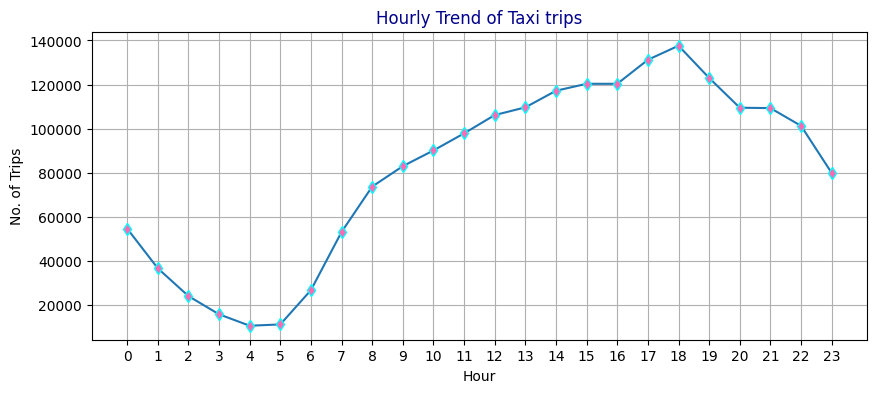

Busiest Hour = 18


In [ ]:
# Visualise the number of trips per hour and find the busiest hour
# Find and show the hourly trends in taxi pickups

grouped_sizes = df_non_zero.groupby('pickup_hour').size()

ax = grouped_sizes.plot(figsize=(10, 4),
                        kind='line',
                        marker='d',
                        markerfacecolor='hotpink',
                        markeredgecolor='cyan')

# Display all hours
ax.set_xticks(range(len(grouped_sizes.keys())))


plt.title('Hourly Trend of Taxi trips', color='darkblue')
plt.xlabel('Hour')
plt.ylabel('No. of Trips')
plt.grid(True)
plt.show()

# Display the busiest hour by number of trips
print(f'Busiest Hour = {grouped_sizes.idxmax(axis="index")}')

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = ny_taxi_sampling_fraction # (0.05 for now)

df_busiest_5_hours = grouped_sizes.sort_values(ascending=False)[0:5]


# Assign a name to the count column
df_busiest_5_hours.name = 'Actual_trip_count'
df_busiest_5_hours = (df_busiest_5_hours / sample_fraction).astype('int64')

df_busiest_5_hours

pickup_hour
18    2751920
17    2624380
19    2459920
16    2406800
15    2406780
Name: Actual_trip_count, dtype: int64

**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends

# Get data for weekdays
df_weekdays = df_non_zero[df_non_zero.tpep_pickup_datetime.dt.weekday.isin(range(0,5))]

# Get data for weekends
df_weekends = df_non_zero[df_non_zero.tpep_pickup_datetime.dt.weekday.isin([5, 6])]


df_grouped_weekdays = df_weekdays.groupby('pickup_hour', observed=False).size()
df_grouped_weekends = df_weekends.groupby('pickup_hour', observed=False).size()


ax = df_grouped_weekdays.plot(figsize=(10, 4), label='Week-Days', kind='line')

df_grouped_weekends.plot(figsize=(10, 4), label='Week-Ends', kind='line', ax=ax)

# Display all hours
ax.set_xticks(range(len(grouped_sizes.keys())))

plt.title('Hourly Trend of Taxi trips for Weekend and Weekdays', color='darkblue')
plt.xlabel('Hour')
plt.ylabel('No. of Trips')
plt.grid(True)
plt.legend(loc="upper left")
plt.show()


What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

***Ans :*** *The above two line graphs for weekdays and weekends show that on weekends the taxi rides are comparitively halved. While weekdays rides peak at around 6pm, but mostly show a gradual increase from early morning till late morning, maintain a steady trip number(peaking at 6 pm for weekday rides) till late night.*

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones

top_10_PU_zones_desc = zones.sort_values(by='trip_count', ascending=False)[0:10]
top_10_DO_zones_desc = zones.sort_values(by='trip_count_DO', ascending=False)[0:10]

print('Top 10 pickup zones')
print('-'*38)
print(top_10_PU_zones_desc[['LocationID', 'borough', 'trip_count']], '\n')

print('\nTop 10 dropoff zones')
print('-'*41)
print(top_10_DO_zones_desc[['LocationID', 'borough', 'trip_count_DO']])


Top 10 pickup zones
--------------------------------------
     LocationID    borough  trip_count
125         132     Queens       95980
227         237  Manhattan       92601
153         161  Manhattan       91310
226         236  Manhattan       83058
154         162  Manhattan       69542
177         186  Manhattan       66829
131         138     Queens       66154
135         142  Manhattan       65404
220         230  Manhattan       64854
162         170  Manhattan       58229 


Top 10 dropoff zones
-----------------------------------------
     LocationID    borough  trip_count_DO
226         236  Manhattan          87254
227         237  Manhattan          82993
153         161  Manhattan          76824
220         230  Manhattan          60359
162         170  Manhattan          58276
154         162  Manhattan          56007
135         142  Manhattan          55429
229         239  Manhattan          55209
134         141  Manhattan          52118
66           68  Manhattan

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios

zones['PU_DO_ratio'] = zones['trip_count']/zones['trip_count_DO']


print('Top 10 pickup/dropoff ratios')
print('-'*39)
print(zones.sort_values(by='PU_DO_ratio', ascending=False)[['LocationID', 'borough', 'PU_DO_ratio']][0:10], '\n')


print('\nBottom 10 dropoff/dropoff ratios')
print('-'*43)
print(zones.sort_values(by='PU_DO_ratio', ascending=True)[['LocationID', 'borough', 'PU_DO_ratio']][0:10])


Top 10 pickup/dropoff ratios
---------------------------------------
     LocationID    borough  PU_DO_ratio
68           70     Queens     8.928945
125         132     Queens     4.327127
131         138     Queens     2.608185
177         186  Manhattan     1.548401
107         114  Manhattan     1.373498
41           43  Manhattan     1.367713
239         249  Manhattan     1.330563
154         162  Manhattan     1.241666
153         161  Manhattan     1.188561
97          100  Manhattan     1.185602 


Bottom 10 dropoff/dropoff ratios
-------------------------------------------
     LocationID        borough  PU_DO_ratio
0             1            EWR     0.008084
235         245  Staten Island     0.029412
241         251  Staten Island     0.033333
108         115  Staten Island     0.037037
175         184          Bronx     0.038462
26           27         Queens     0.050000
247         257       Brooklyn     0.050061
62           64         Queens     0.051163
121         128

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones

#zones['PU_plus_DO'] = zones['trip_count'] + zones['trip_count_DO']

night_zones = df_non_zero[df_non_zero.pickup_hour.isin([0, 1, 2, 3, 4, 11])]
night_zones = night_zones.groupby(['pickup_hour', 'PULocationID']).agg(agg_trip_count=('pickup_hour', 'count'))
high_pickup_zones = night_zones.reset_index()[0:10]

#night_zones['PU_plus_DO'] = night_zones['trip_count'] + night_zones['trip_count_DO']

night_zones_DO = df_non_zero[df_non_zero.tpep_dropoff_datetime.dt.hour.isin([0, 1, 2, 3, 4, 11])]
night_zones_DO = night_zones_DO.groupby(['dropoff_hour', 'DOLocationID']).agg(agg_trip_count_DO=('dropoff_hour', 'count'))
high_pickup_zones_DO = night_zones_DO.reset_index()[0:10]

print('Top 10 Pickup Zones')
print('-'*44)
print(high_pickup_zones.sort_values('agg_trip_count', ascending=False))

print('\n\nTop 10 Dropoff Zones')
print('-'*48)
print(high_pickup_zones_DO.sort_values('agg_trip_count_DO', ascending=False))


Top 10 Pickup Zones
--------------------------------------------
   pickup_hour  PULocationID  agg_trip_count
0            0             4             255
6            0            13              50
2            0             7              36
8            0            17              12
5            0            12               6
3            0            10               6
7            0            14               4
1            0             6               3
4            0            11               1
9            0            22               1


Top 10 Dropoff Zones
------------------------------------------------
   dropoff_hour  DOLocationID  agg_trip_count_DO
5             0             7                548
2             0             4                511
8             0            10                136
1             0             3                 13
9             0            11                 10
0             0             1                  8
7             0          

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)

night_mask = df_non_zero.pickup_hour.isin([0, 1, 2, 3, 4, 11])
tot_revenue = df_non_zero['total_amount'].sum()

night_revenue = df_non_zero[night_mask]
night_revenue = night_revenue['total_amount'].sum()

day_revenue = df_non_zero[~night_mask]
day_revenue = day_revenue['total_amount'].sum()

revenue_share_day_night = pd.DataFrame({'Time':['Night', 'Day'], 'Revenue':[night_revenue, day_revenue]})
revenue_share_day_night = revenue_share_day_night.set_index('Time')

ax = revenue_share_day_night.plot(x='Time',
                                  y='Revenue',
                                  kind = 'pie',
                                  autopct='%1.1f%%',
                                  startangle=0,
                                  figsize=(6, 6))

plt.legend(title="Time of Day", loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))


plt.title('Day-Night revenue proportion', color='RebeccaPurple')
plt.ylabel('')
plt.show()


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

   passenger_count  avg_fare_mile_passenger
0                1                 5.779867
1                2                 2.695361
2                3                 1.850809
3                4                 1.384917
4                5                 1.137275
5                6                 0.950332


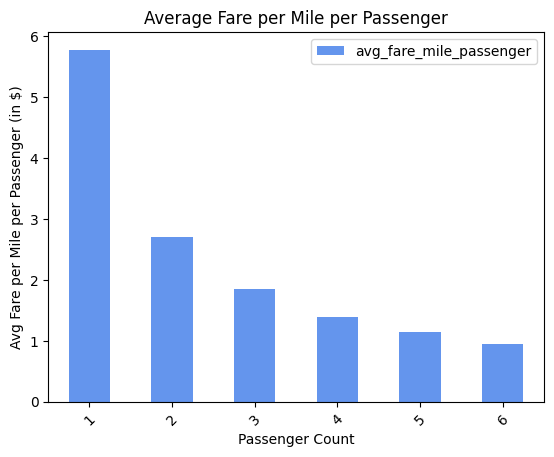

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts

# Create and add derived columns for easier analysis
df_pricing = df_non_zero.copy(deep=True)
df_pricing = df_pricing.groupby('passenger_count').agg(agg_fare_avg=('fare_amount', 'mean'),
                                          agg_dist_avg=('trip_distance', 'mean'))


df_pricing = df_pricing.reset_index()
df_pricing['passenger_count'] = df_pricing['passenger_count'].astype('int32')
df_pricing['avg_fare_mile_passenger'] = (df_pricing.agg_fare_avg / df_pricing.agg_dist_avg) / df_pricing.passenger_count


print(df_pricing[['passenger_count', 'avg_fare_mile_passenger']])

ax = df_pricing.plot.bar(x='passenger_count',
                         y='avg_fare_mile_passenger',
                         title='Average Fare per Mile per Passenger',
                         color='CornflowerBlue',
                         rot=45)

plt.ylabel('Avg Fare per Mile per Passenger (in $)')
plt.xlabel('Passenger Count')
plt.show()

**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

    pickup_hour  avg_fare_mile_hour
0             0            5.146082
1             1            5.244715
2             2            5.299935
3             3            5.119600
4             4            4.721164
5             5            4.491901
6             6            4.697216
7             7            5.282608
8             8            5.782841
9             9            5.880553
10           10            5.932183
11           11            6.092223
12           12            6.065431
13           13            5.926284
14           14            5.873958
15           15            5.945468
16           16            5.944921
17           17            6.100956
18           18            6.084940
19           19            5.755746
20           20            5.446322
21           21            5.387498
22           22            5.324499
23           23            5.142508


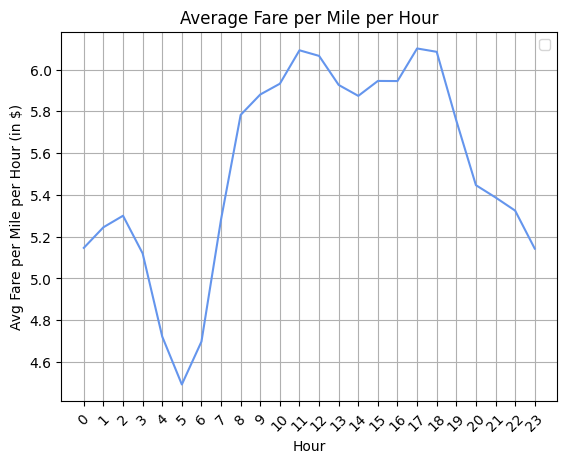

  ordered_day_name  avg_fare_mile_day
0           Monday           5.386206
1          Tuesday           5.820714
2        Wednesday           5.922693
3         Thursday           5.911326
4           Friday           5.767600
5         Saturday           5.767190
6           Sunday           5.261893


In [ ]:
# Compare the average fare per mile for different days and for different times of the day

# Create and add derived columns for easier analysis
df_pricing = df_non_zero.copy(deep=True)
df_pricing = df_pricing.groupby('pickup_hour').agg(agg_fare_avg=('fare_amount', 'mean'),
                                                   agg_dist_avg=('trip_distance', 'mean'))


df_pricing = df_pricing.reset_index()
df_pricing['pickup_hour'] = df_pricing['pickup_hour'].astype('int32')
df_pricing['avg_fare_mile_hour'] = (df_pricing.agg_fare_avg / df_pricing.agg_dist_avg)


print(df_pricing[['pickup_hour', 'avg_fare_mile_hour']])

ax = df_pricing.plot.line(x='pickup_hour',
                          y='avg_fare_mile_hour',
                          title='Average Fare per Mile per Hour',
                          color='CornflowerBlue',
                          rot=45)
# Display all hours
ax.set_xticks(range(len(df_pricing)))

plt.ylabel('Avg Fare per Mile per Hour (in $)')
plt.xlabel('Hour')
plt.grid(True)
plt.legend('')
plt.show()


# ###------------------------------------###

# Create and add derived columns for easier analysis
df_pricing = df_non_zero.copy(deep=True)
df_pricing = df_pricing.groupby('ordered_day_name', observed=False).agg(agg_fare_avg=('fare_amount', 'mean'),
                                                    agg_dist_avg=('trip_distance', 'mean'))


df_pricing = df_pricing.reset_index()
df_pricing['avg_fare_mile_day'] = (df_pricing.agg_fare_avg / df_pricing.agg_dist_avg)


print(df_pricing[['ordered_day_name', 'avg_fare_mile_day']])

ax = df_pricing.plot.line(x='ordered_day_name',
                          y='avg_fare_mile_day',
                          title='Average Fare per Mile per DayofWeek',
                          color='DarkMagenta',
                          rot=45)
# Display all hours
ax.set_xticks(range(len(df_pricing)))

plt.ylabel('Avg Fare per Mile per Day-of-Week (in $)')
plt.xlabel('Day')
plt.grid(True)
plt.legend('')
plt.show()

**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

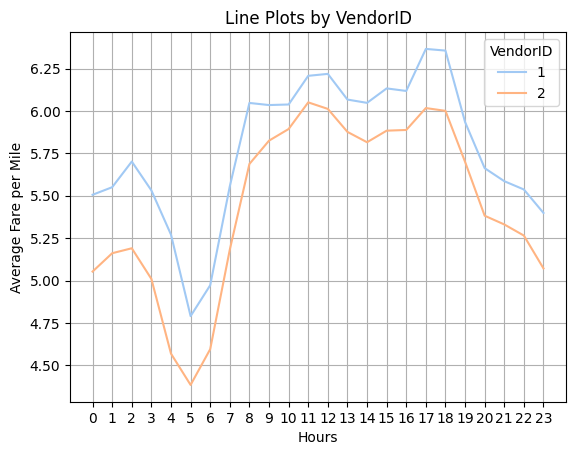

In [ ]:
# Compare fare per mile for different vendors

# Create and add derived columns for easier analysis
df_pricing = df_non_zero.copy(deep=True)
df_pricing = df_pricing.groupby(['pickup_hour', 'VendorID'],
             observed=False).agg(agg_fare_avg=('fare_amount', 'mean'),
                                 agg_dist_avg=('trip_distance', 'mean'))


df_pricing = df_pricing.reset_index()
#df_pricing['VendorID'] = df_pricing['VendorID'].astype('int32')
df_pricing['avg_fare_mile_vendor_hour'] = (df_pricing.agg_fare_avg / df_pricing.agg_dist_avg)



ax = sns.lineplot(data=df_pricing,
             x='pickup_hour',
             y='avg_fare_mile_vendor_hour',
             hue='VendorID', palette='pastel')


# Display all hours
ax.set_xticks(range(24))

ax.set_xlabel('Hours')
ax.set_ylabel('Average Fare per Mile')

plt.title('Line Plots by VendorID')
plt.legend
plt.grid(True)
plt.show()


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers



##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times



Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%



**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

In [ ]:
# See how passenger count varies across hours and days




**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [ ]:
# How does passenger count vary across zones



In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.



Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [ ]:
# How often is each surcharge applied?



## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies


 [Speed-Cogestion](https://colab.research.google.com/drive/17sbqOVGQ2rjYKUq16ybRyw5lpwE9px7g#scrollTo=Ovf-1vIyhk7E&line=2&uniqifier=1)

As can be seen from the output of the above cell, there are routes with congestion at particular hours of the day. To overcome slower speeds, rerouting of cabs should be taken up for those routes, during those specific times.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

As can be seen from the visualization of trips relative to

1. Hours in a day
2. Days of the Week
3. Months of the year

we can easily come to the conclusion that more cabs should be made available during **Thursdays**, as trips peak on these days.

Also on a day to day basis, **evening 4 pm to 8 pm** the number of trips is high, so to provide for better availability of cabs taxis on these times, some considerations need to be done.

Also Section 3.2.7 shows the zones with high pickup and dropoff volumes on hourly basis. this data can help route cabs to high demand areas at those times of the day.

The geospatial data of trip volumes from Section 3.1.13 shows zones with higher trip volumes. This map can help us dispatch cabs to relevant locations.


**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.